# DATA EXPLORATION
- Goal: Address each of the questions you posed in your planning and brainstorming and any others you have come up with along the way through **visual or statistical analysis**.

- When you have completed this step, you will have the findings from your analysis that will be used in your final report, answers to specific questions your customers has asked, and information to move forward toward building a model.

- Run at least **1 t-test** and **1 correlation test** (but as many as you need!)

- **Visualize** all combinations of variables in some way(s).

- What **independent variables** are **correlated** with the **dependent**? (this is good)

- Which **independent variables** are **correlated** with other **independent** variables? (this is not so good and needs to be addressed)

- **Summarize** your takeaways and conclusions.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from split_scale import split_data


In [3]:
train, test = split_data()
train.head()

,home_size,bedroomcnt,bathroomcnt,home_value
5364,1449.0,3.0,2.0,363906.0
10814,3739.0,4.0,3.0,1203071.0
10863,1920.0,3.0,2.5,507625.0
12983,1574.0,4.0,3.0,569000.0
325,1992.0,3.0,3.0,592398.0


In [8]:
train.describe()

,home_size,bedroomcnt,bathroomcnt,home_value
count,16525.000000,16525.000000,16525.000000,1.652500e+04
mean,1705.842723,3.129501,2.207443,3.836680e+05
std,722.042262,1.022823,0.857189,2.991254e+05
min,215.000000,0.000000,1.000000,7.584000e+03
25%,1196.000000,2.000000,2.000000,1.841670e+05
50%,1545.000000,3.000000,2.000000,3.100000e+05
75%,2053.000000,4.000000,3.000000,4.923960e+05
max,5056.000000,7.000000,5.000000,2.045470e+06


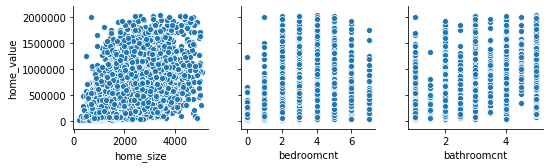

In [7]:
sns.pairplot(train,x_vars= ['home_size', 'bedroomcnt', 'bathroomcnt'], y_vars='home_value')

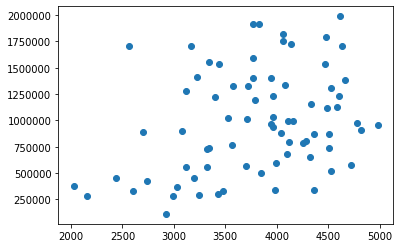

In [19]:
y = train[(train.bathroomcnt == 5) & (train.bedroomcnt == 5)].home_value
x = train[(train.bathroomcnt == 5) & (train.bedroomcnt == 5)].home_size
plt.scatter(x, y)

In [10]:
train.corr()

,home_size,bedroomcnt,bathroomcnt,home_value
home_size,1.000000,0.656067,0.765665,0.525722
bedroomcnt,0.656067,1.000000,0.575882,0.221965
bathroomcnt,0.765665,0.575882,1.000000,0.436175
home_value,0.525722,0.221965,0.436175,1.000000


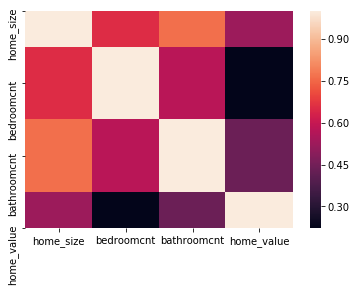

In [11]:
sns.heatmap(train.corr())

## Summary

home_size, bedroomcnt and bathroomcnt are all correlated with each other, home_size has the strongest correlation with he home_value